<a href="https://colab.research.google.com/github/Zelkova46/kenkyushimasu_Nikkei225/blob/main/multivariate_Cleaned_Nikkei225_daily_forecastingNclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

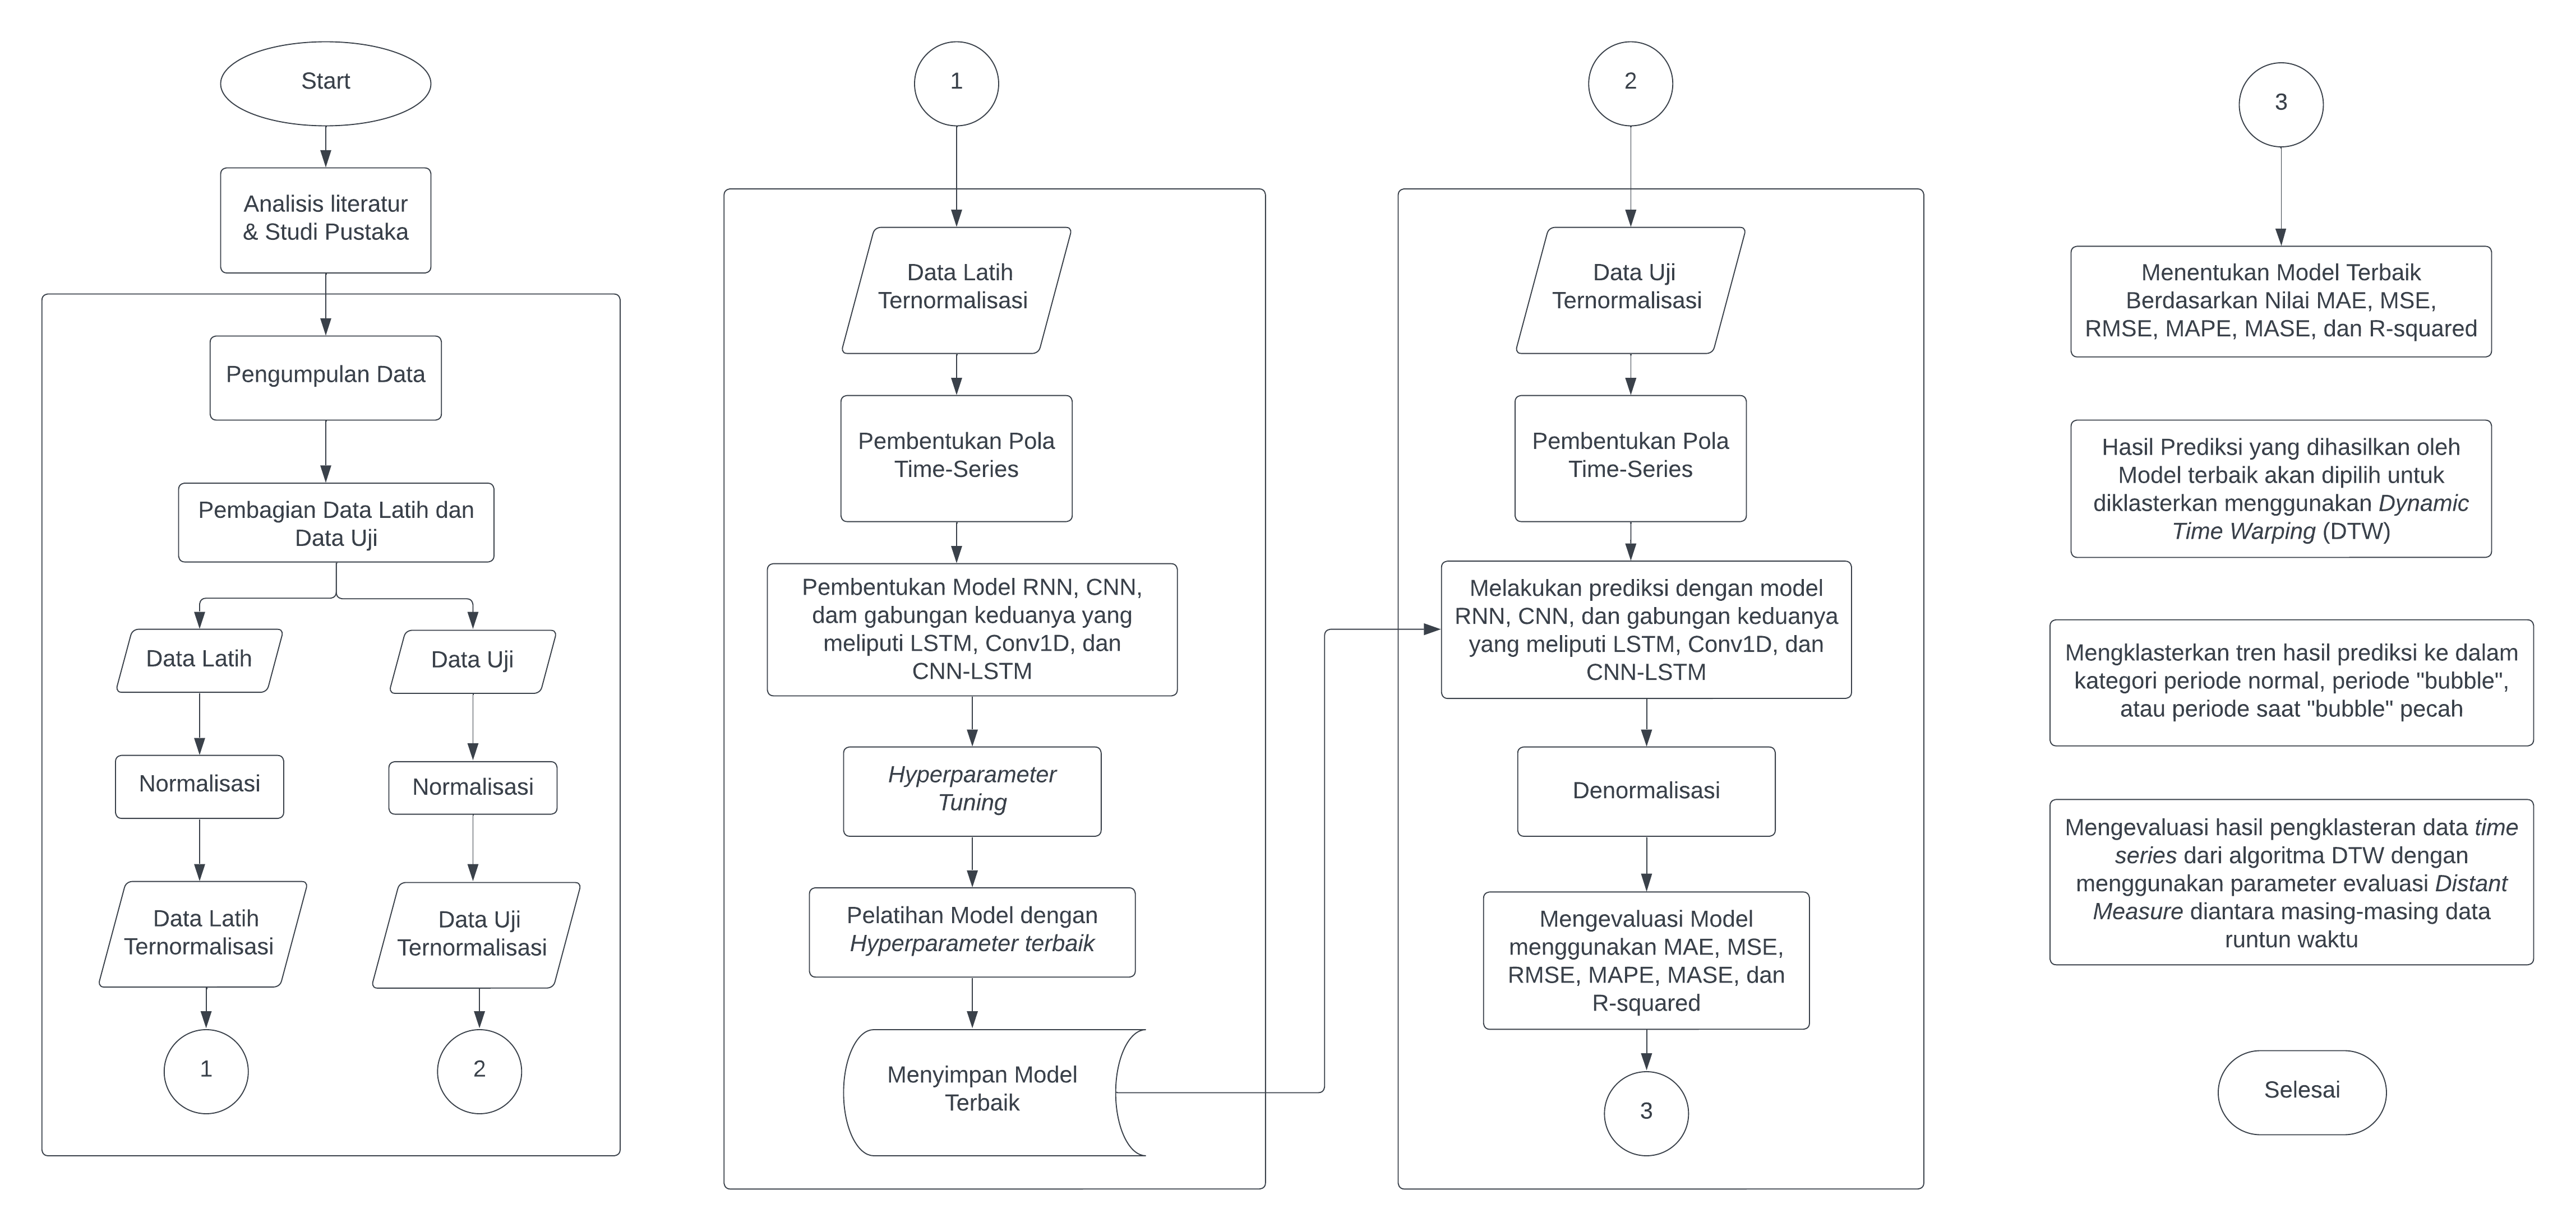

## Get Data

Sumber data: https://finance.yahoo.com/quote/%5EN225?p=%5EN225


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [ ]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225_daily.csv

--2024-02-27 07:46:20--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112773 (1.1M) [text/plain]
Saving to: ‘^N225_daily.csv’

^N225_daily.csv     100%[===================>]   1.06M  --.-KB/s    in 0.07s   

2024-02-27 07:46:20 (16.0 MB/s) - ‘^N225_daily.csv’ saved [1112773/1112773]



## Import data time series dengan pandas

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/^N225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-25,33414.511719,33414.511719,33221.570313,33254.031250,33254.031250,58900000.0
2023-12-26,33295.679688,33312.261719,33181.359375,33305.851563,33305.851563,68300000.0
2023-12-27,33532.968750,33755.750000,33521.519531,33681.238281,33681.238281,93700000.0
2023-12-28,33477.468750,33571.730469,33411.238281,33539.621094,33539.621094,73300000.0
2023-12-29,33458.640625,33652.710938,33305.171875,33464.171875,33464.171875,89000000.0


In [ ]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14351 entries, 1968-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       13773 non-null  float64
 1   High       13773 non-null  float64
 2   Low        13773 non-null  float64
 3   Close      13773 non-null  float64
 4   Adj Close  13773 non-null  float64
 5   Volume     13773 non-null  float64
dtypes: float64(6)
memory usage: 784.8 KB


data saham hanya digunakan saat harga close

In [ ]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


,Closing Price (Yen)
Date,
2023-12-25,33254.031250
2023-12-26,33305.851563
2023-12-27,33681.238281
2023-12-28,33539.621094
2023-12-29,33464.171875


Informasi jumlah data

In [ ]:
len(nikkei225_df)

14351

menampilkan missing data

In [ ]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

            Closing Price (Yen)
Date                           
1968-01-10                  NaN
1968-01-15                  NaN
1968-02-12                  NaN
1968-03-21                  NaN
1968-04-29                  NaN
...                         ...
2018-09-24                  NaN
2018-10-08                  NaN
2018-11-23                  NaN
2018-12-24                  NaN
2018-12-31                  NaN

[578 rows x 1 columns]


In [ ]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    578
dtype: int64

## menghapus semua data yang memiliki nilai NULL

In [ ]:
nikkei225_close_df = nikkei225_close_df.dropna()


In [ ]:

len(nikkei225_close_df)

13773

In [ ]:
nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate dan money supply

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [ ]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv

--2024-02-27 07:46:21--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8741 (8.5K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]   8.54K  --.-KB/s    in 0s      

2024-02-27 07:46:21 (46.9 MB/s) - ‘discountRate.csv’ saved [8741/8741]



In [ ]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv

--2024-02-27 07:46:21--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8817 (8.6K) [text/plain]
Saving to: ‘moneyStock.csv’

moneyStock.csv      100%[===================>]   8.61K  --.-KB/s    in 0s      

2024-02-27 07:46:21 (56.7 MB/s) - ‘moneyStock.csv’ saved [8817/8817]



# Import data time seres tambahan: discount rate dan money supply

import data discount rate

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[:3]

,discRate
Date,
1968-01-01,6.21
1968-02-01,6.21
1968-03-01,6.21


In [ ]:
len(discRate_df)

672

menampilkan missing data

In [ ]:
print(discRate_df.isnull().sum())

discRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [ ]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [ ]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [6.21, 6.21, 6.21])

In [ ]:
len(discountRate_value)

672

import data money supply menjadi dataframe

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data money supply
moneySupply_df = pd.read_csv("/content/moneyStock.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

moneySupply_df[:3]

,moneyStock
Date,
1968-01-01,15.7
1968-02-01,15.8
1968-03-01,15.3


In [ ]:
len(moneySupply_df)

672

menampilkan missing data

In [ ]:
print(moneySupply_df.isnull().sum())

moneyStock    0
dtype: int64


import data money supply (M2)

In [ ]:
# import dan format historikal data dengan python

timesteps_moneyStock = []
moneyStock_value = []

with open("/content/moneyStock.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_moneyStock.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    moneyStock_value.append(float(line[1])) #membaca nilai moneyStock


In [ ]:
timesteps_moneyStock[:3], moneyStock_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [15.7, 15.8, 15.3])

In [ ]:
type(timesteps_moneyStock), type(moneyStock_value)

(list, list)

In [ ]:
len(moneyStock_value)

672

# Mengumpulkan data menjadi satu dataframe

In [ ]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate
nikkei225_close_multivariate_df["money_stock"] = None
nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.270020,None,None
1968-01-05,1282.380005,None,None
1968-01-08,1283.530029,None,None
1968-01-09,1305.939941,None,None
1968-01-11,1316.890015,None,None
...,...,...,...
2023-12-25,33254.031250,None,None
2023-12-26,33305.851563,None,None
2023-12-27,33681.238281,None,None


menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [ ]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "money_stock"] = moneyStock_value[x]
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [ ]:
moneySupply_df[:3], discRate_df[:3]

(            moneyStock
 Date                  
 1968-01-01        15.7
 1968-02-01        15.8
 1968-03-01        15.3,
             discRate
 Date                
 1968-01-01      6.21
 1968-02-01      6.21
 1968-03-01      6.21)

In [ ]:
nikkei225_close_multivariate_df[:30]

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.270020,15.7,6.21
1968-01-05,1282.380005,15.7,6.21
1968-01-08,1283.530029,15.7,6.21
1968-01-09,1305.939941,15.7,6.21
1968-01-11,1316.890015,15.7,6.21
1968-01-12,1314.469971,15.7,6.21
1968-01-16,1314.979980,15.7,6.21
1968-01-17,1314.979980,15.7,6.21
1968-01-18,1322.989990,15.7,6.21


In [ ]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [ ]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Time")
  plt.ylabel("Saham Nikkei225 Penutupan (mingguan)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

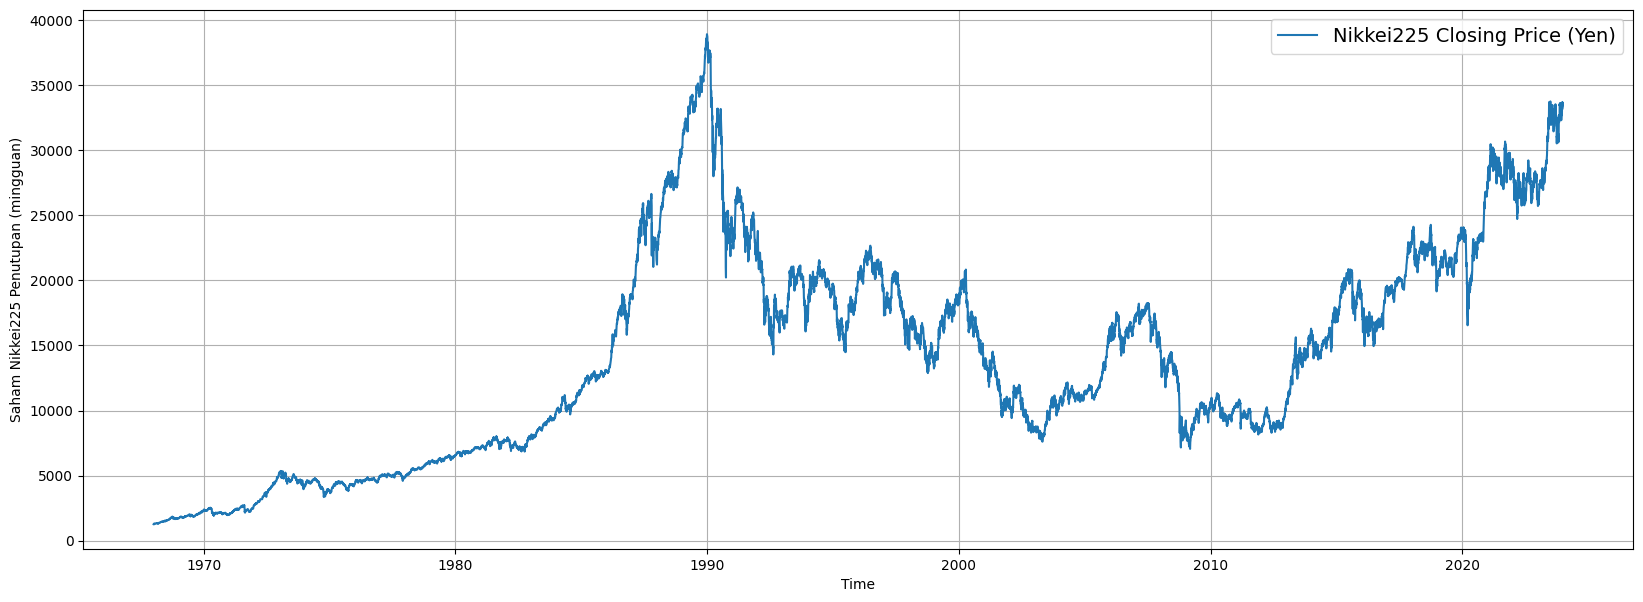

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

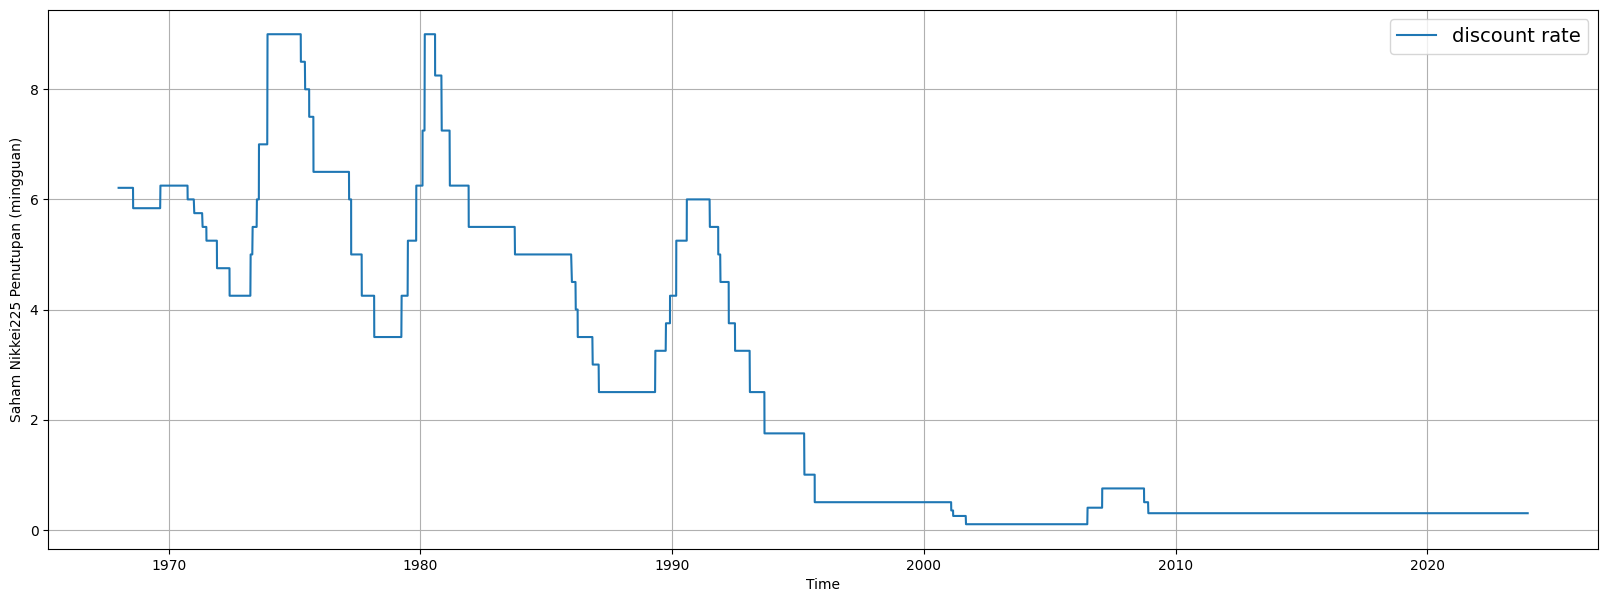

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


Visualisasi data money supply

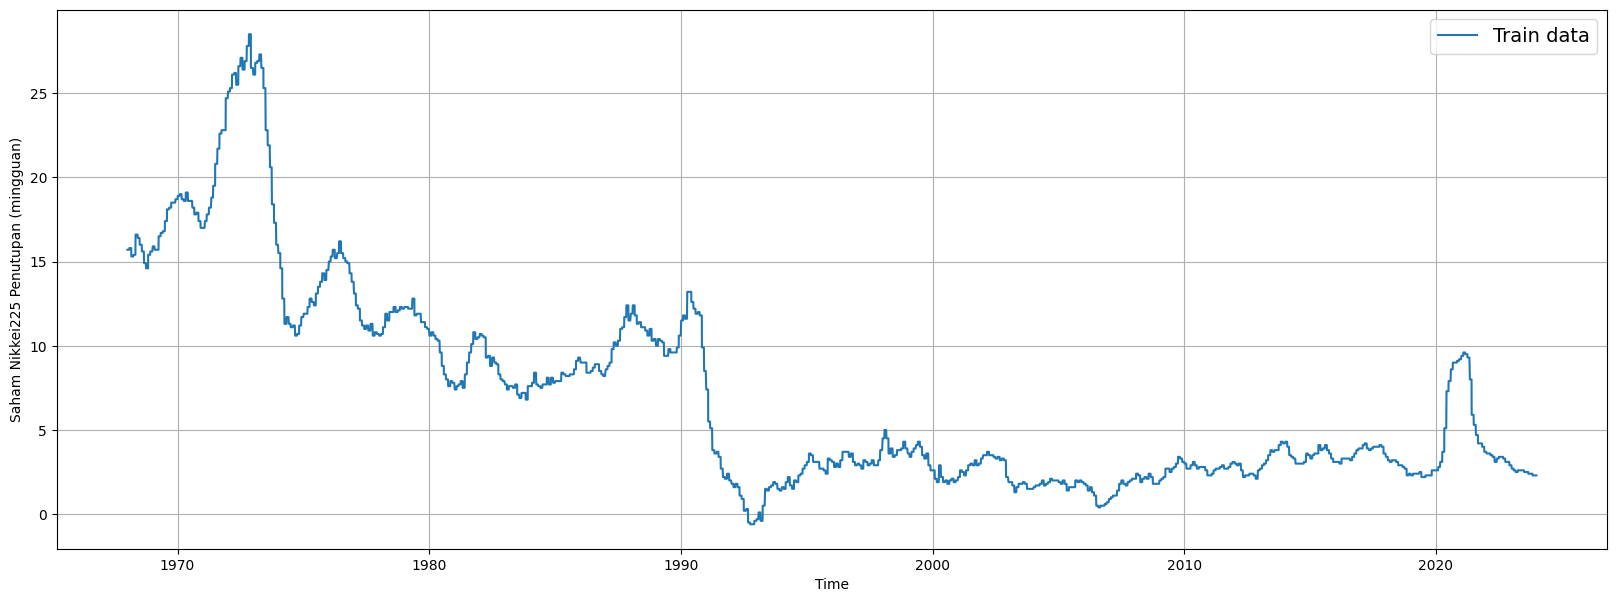

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data")


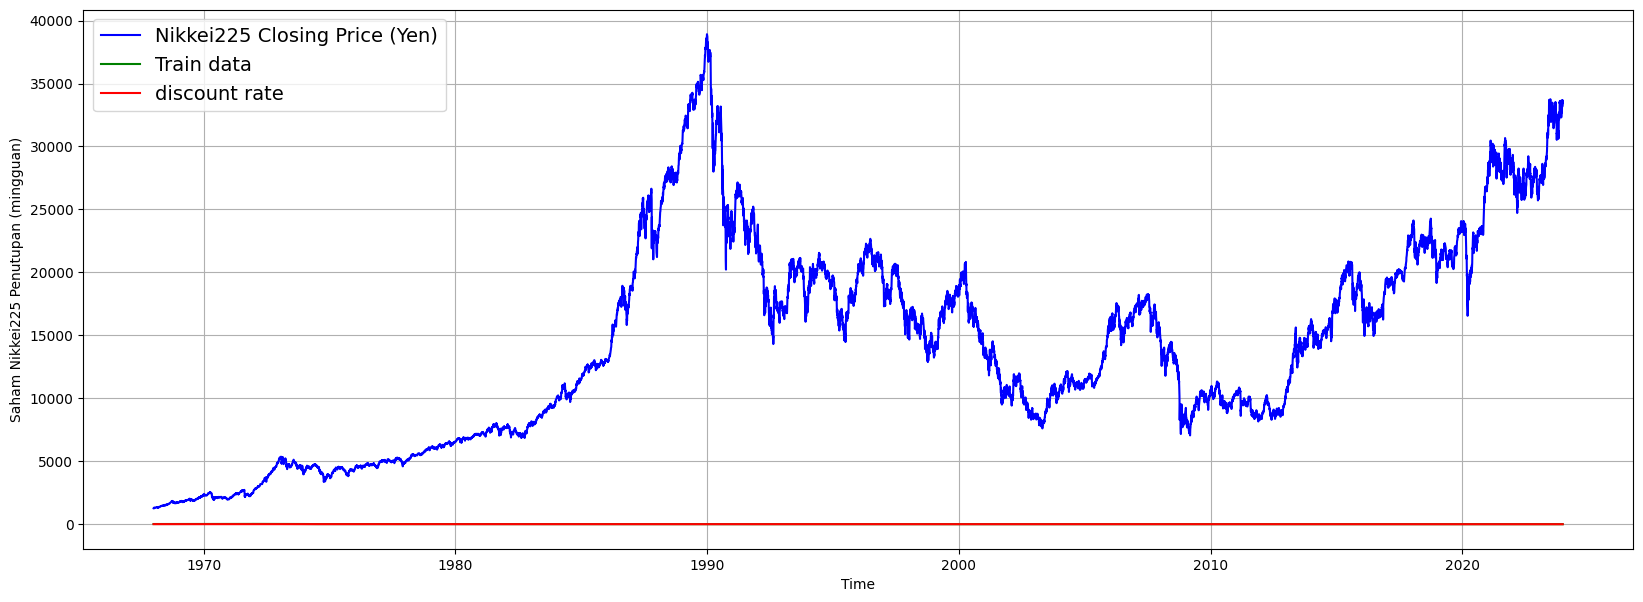

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [ ]:
# Langkah 1 : konversi setiap fitur menjadi 2D-array dengan konfigurasi : (jumlah sample, 1)


In [ ]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [ ]:
# Melakukan normalization
scaler.transform(nikkei225_close_multivariate_df)

array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
       [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964455e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57203002e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55199018e-01, 9.96563574e-02, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [ ]:
normalized_data  = scaler.transform(nikkei225_close_multivariate_df)
normalized_data


array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
       [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964455e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57203002e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55199018e-01, 9.96563574e-02, 2.24719101e-02]])

In [ ]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (13773, 3)


In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892582e-04],
       [4.58438031e-04],
       ...,
       [8.60964455e-01],
       [8.57203002e-01],
       [8.55199018e-01]])

In [ ]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [ ]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [ ]:
scaled_nikkei225_close_multivariate_df

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517
2,0.000458,0.560137,0.686517
3,0.001054,0.560137,0.686517
4,0.001345,0.560137,0.686517
...,...,...,...
13768,0.849618,0.099656,0.022472
13769,0.850994,0.099656,0.022472
13770,0.860964,0.099656,0.022472
13771,0.857203,0.099656,0.022472


LAtihan denormalisasi

In [ ]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [ ]:
len(scaler.transform(nikkei225_close_multivariate_df ))

13773

In [ ]:
scaler.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892582e-04],
       [4.58438031e-04],
       ...,
       [8.60964455e-01],
       [8.57203002e-01],
       [8.55199018e-01]])

Visualisasi data yang di normalisasi

In [ ]:
scaled_nikkei225_close_multivariate_df["money_stock"]

0        0.560137
1        0.560137
2        0.560137
3        0.560137
4        0.560137
           ...   
13768    0.099656
13769    0.099656
13770    0.099656
13771    0.099656
13772    0.099656
Name: money_stock, Length: 13773, dtype: float64

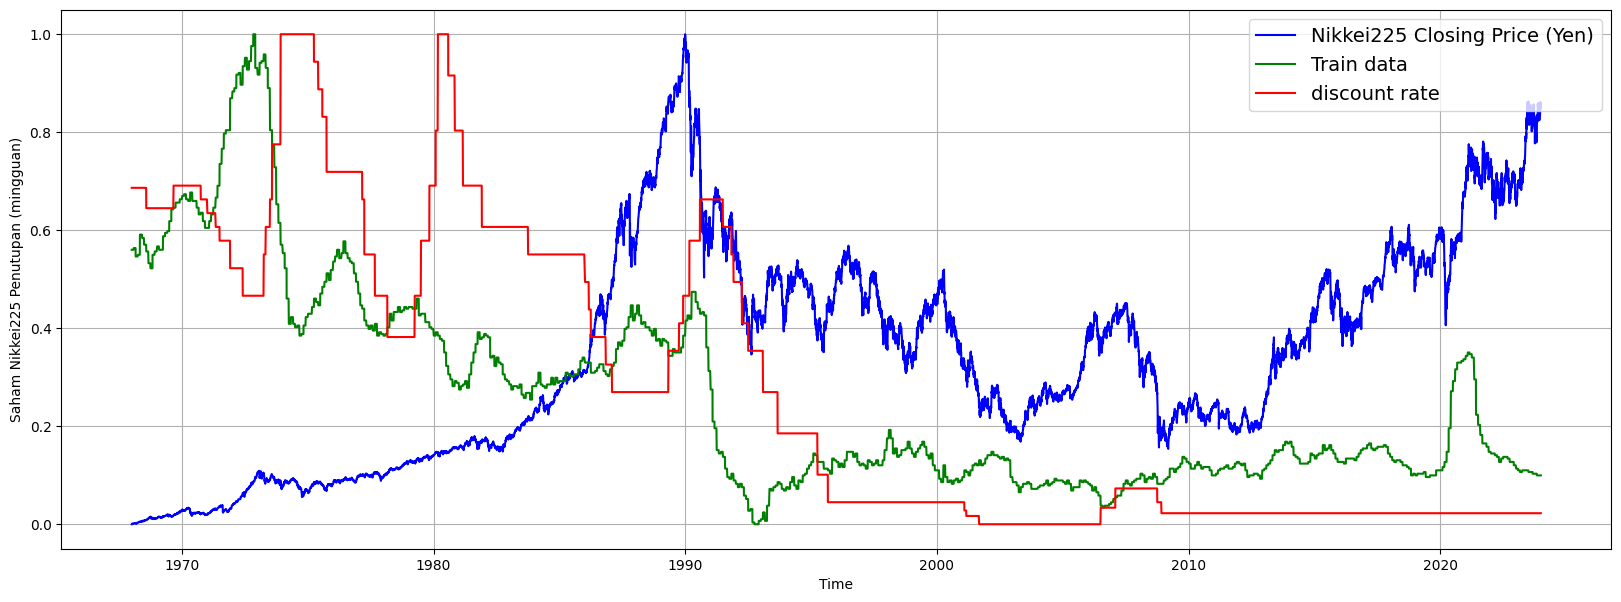

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["money_stock"], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


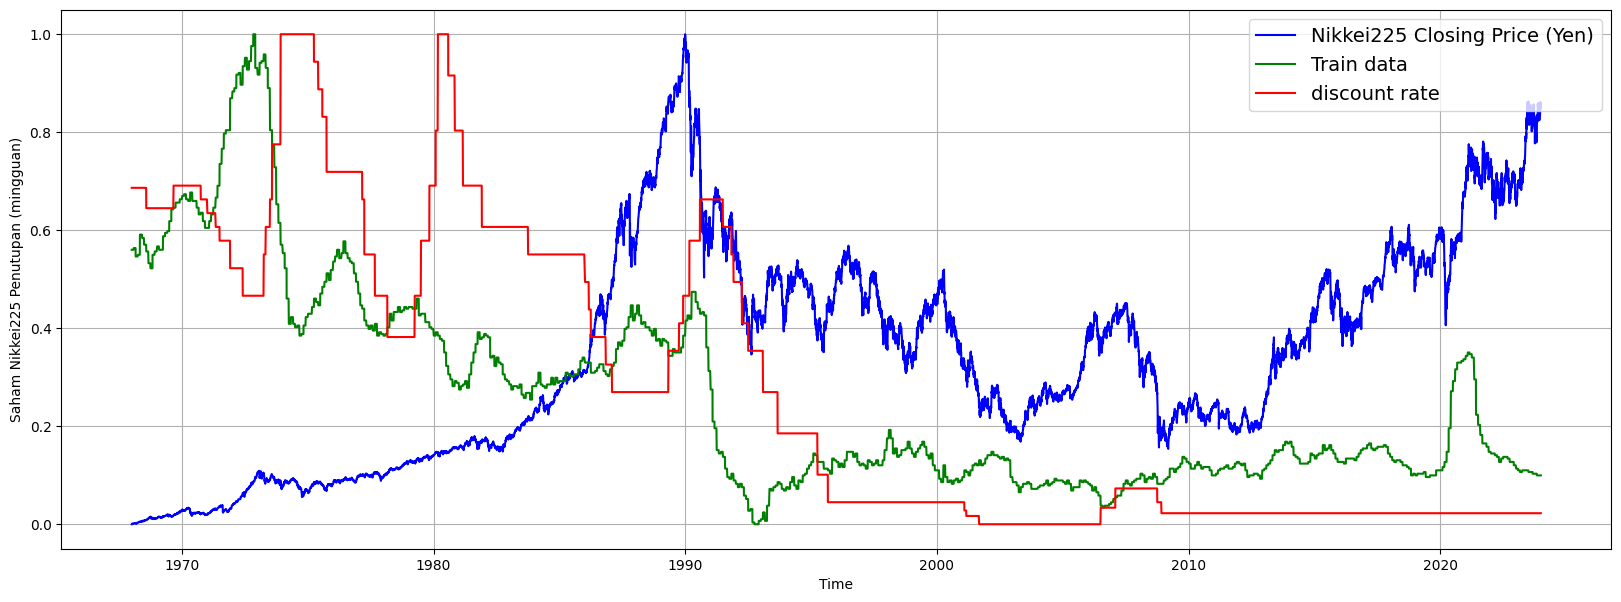

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,2], format = "-", label = "discount rate", color = 'r')



# menghitung korelasi antar time series

In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892582e-04],
       [4.58438031e-04],
       ...,
       [8.60964455e-01],
       [8.57203002e-01],
       [8.55199018e-01]])

In [ ]:
(normalized_data[:,0])

array([0.00000000e+00, 4.27892582e-04, 4.58438031e-04, ...,
       8.60964455e-01, 8.57203002e-01, 8.55199018e-01])

In [ ]:
type(normalized_data[:,0])

numpy.ndarray

In [ ]:
import numpy as np
# menghitung koefisien korelasi dengan numpy

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,1])
print("Correlation coefficient saham dengan mooney supply: \n", corr_coef)

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,2])
print("Correlation coefficient saham dengan discount rate: \n", corr_coef)

Correlation coefficient saham dengan mooney supply: 
 [[ 1.        -0.4704392]
 [-0.4704392  1.       ]]
Correlation coefficient saham dengan discount rate: 
 [[ 1.         -0.48504944]
 [-0.48504944  1.        ]]


In [ ]:

# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "pearson")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.470439      -0.485049
money_stock                    -0.470439     1.000000       0.706540
discount_rate                  -0.485049     0.706540       1.000000


In [ ]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "spearman")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.438711      -0.445539
money_stock                    -0.438711     1.000000       0.688417
discount_rate                  -0.445539     0.688417       1.000000


In [ ]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "kendall")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.297523      -0.287226
money_stock                    -0.297523     1.000000       0.481280
discount_rate                  -0.287226     0.481280       1.000000


mungkin plotnya yang ini bisa di zoom supaya keliatan perbedaan data fluktuasi minigguan dan bulanannya

# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

SPLIT_SIZE = 0.9 # 80% data untuk train test 20% untuk test size

In [ ]:
nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.270020,15.7,6.21
1968-01-05,1282.380005,15.7,6.21


In [ ]:
scaled_nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517


membuat window dan horizon multivariate

In [ ]:
len(scaled_nikkei225_close_multivariate_df)

13773

In [ ]:

# データ数
sample_size = len(scaled_nikkei225_close_multivariate_df)
# 予測に用いる期間
train_size = int(sample_size*SPLIT_SIZE)
test_size = sample_size - train_size

In [ ]:
sample_size

13773

In [ ]:
# データセットを作る関数

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [ ]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# 最小0、最大1に正規化
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_moneyStock, y_moneyStock = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[2], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# 多変量LSTM用に各データを結合
X_concat = np.concatenate([X_nikkei, X_moneyStock, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_moneyStock, y_discRate], axis=2)

In [ ]:
full_windows = X_concat
full_labels = y_concat

In [ ]:
len(full_windows), len(full_labels)

(13766, 13766)

In [ ]:
scaled_nikkei225_close_multivariate_df[:13]

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517
2,0.000458,0.560137,0.686517
3,0.001054,0.560137,0.686517
4,0.001345,0.560137,0.686517
5,0.001280,0.560137,0.686517
6,0.001294,0.560137,0.686517
7,0.001294,0.560137,0.686517
8,0.001507,0.560137,0.686517
9,0.001234,0.560137,0.686517


In [ ]:
print(full_windows[0]),
print(full_windows.shape)
print("\n")
print(full_labels[0])
print(full_labels.shape)

[[0.00000000e+00 5.60137457e-01 6.86516854e-01]
 [4.27892582e-04 5.60137457e-01 6.86516854e-01]
 [4.58438031e-04 5.60137457e-01 6.86516854e-01]
 [1.05366112e-03 5.60137457e-01 6.86516854e-01]
 [1.34450282e-03 5.60137457e-01 6.86516854e-01]
 [1.28022475e-03 5.60137457e-01 6.86516854e-01]
 [1.29377095e-03 5.60137457e-01 6.86516854e-01]]
(13766, 7, 3)


[[0.00129377 0.56013746 0.68651685]]
(13766, 1, 3)


In [ ]:
print(full_windows[1]),
print(full_windows.shape)
print("\n")
print(full_labels[1])
print(full_labels.shape)

[[4.27892582e-04 5.60137457e-01 6.86516854e-01]
 [4.58438031e-04 5.60137457e-01 6.86516854e-01]
 [1.05366112e-03 5.60137457e-01 6.86516854e-01]
 [1.34450282e-03 5.60137457e-01 6.86516854e-01]
 [1.28022475e-03 5.60137457e-01 6.86516854e-01]
 [1.29377095e-03 5.60137457e-01 6.86516854e-01]
 [1.29377095e-03 5.60137457e-01 6.86516854e-01]]
(13766, 7, 3)


[[0.00150652 0.56013746 0.68651685]]
(13766, 1, 3)


format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [ ]:
full_windows.shape

(13766, 7, 3)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)**

In [ ]:
full_labels.shape

(13766, 1, 3)

In [ ]:
full_labels = np.squeeze(full_labels)
full_labels.shape

(13766, 3)

In [ ]:
full_labels[:3]

array([[0.00129377, 0.56013746, 0.68651685],
       [0.00150652, 0.56013746, 0.68651685],
       [0.00123428, 0.56013746, 0.68651685]])

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [ ]:
(sample_size), (train_size), (test_size)

(13773, 12395, 1378)

In [ ]:
train_size

12395

In [ ]:
train_windows = full_windows[:train_size]
test_windows = full_windows[train_size:]

train_labels = full_labels[:train_size]
test_labels = full_labels[train_size:]

In [ ]:
len(full_windows), len(train_windows), len(test_windows)

(13766, 12395, 1371)

In [ ]:
"windows", train_windows[12393:], "Labels",train_labels[12393:]

('windows',
 array([[[0.56390796, 0.13058419, 0.02247191],
         [0.57084829, 0.13058419, 0.02247191],
         [0.57370035, 0.13058419, 0.02247191],
         [0.57242969, 0.13058419, 0.02247191],
         [0.56975266, 0.13058419, 0.02247191],
         [0.57297019, 0.13058419, 0.02247191],
         [0.57541352, 0.13058419, 0.02247191]],
 
        [[0.57084829, 0.13058419, 0.02247191],
         [0.57370035, 0.13058419, 0.02247191],
         [0.57242969, 0.13058419, 0.02247191],
         [0.56975266, 0.13058419, 0.02247191],
         [0.57297019, 0.13058419, 0.02247191],
         [0.57541352, 0.13058419, 0.02247191],
         [0.57732615, 0.13058419, 0.02247191]]]),
 'Labels',
 array([[0.57732615, 0.13058419, 0.02247191],
        [0.57620982, 0.13058419, 0.02247191]]))

In [ ]:
"windows", test_windows[:2], "Labels",test_labels[:2]

('windows',
 array([[[0.57370035, 0.13058419, 0.02247191],
         [0.57242969, 0.13058419, 0.02247191],
         [0.56975266, 0.13058419, 0.02247191],
         [0.57297019, 0.13058419, 0.02247191],
         [0.57541352, 0.13058419, 0.02247191],
         [0.57732615, 0.13058419, 0.02247191],
         [0.57620982, 0.13058419, 0.02247191]],
 
        [[0.57242969, 0.13058419, 0.02247191],
         [0.56975266, 0.13058419, 0.02247191],
         [0.57297019, 0.13058419, 0.02247191],
         [0.57541352, 0.13058419, 0.02247191],
         [0.57732615, 0.13058419, 0.02247191],
         [0.57620982, 0.13058419, 0.02247191],
         [0.5690225 , 0.13058419, 0.02247191]]]),
 'Labels',
 array([[0.5690225 , 0.13058419, 0.02247191],
        [0.5623098 , 0.13058419, 0.02247191]]))

# LANJUT BIKIN FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  #mase = mean_absolute_scaled_error(y_true, y_pred) #tidak digunakan

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)

  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    #mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          #"mase" : mase.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    verbose = 1,
                                                                    save_best_only = True)

# Model 0 : Keras Encoder & Decoder

In [ ]:
train_windows.shape

(12395, 7, 3)

In [ ]:
train_windows[0:2]

array([[[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
        [4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366112e-03, 5.60137457e-01, 6.86516854e-01],
        [1.34450282e-03, 5.60137457e-01, 6.86516854e-01],
        [1.28022475e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01]],

       [[4.27892582e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58438031e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366112e-03, 5.60137457e-01, 6.86516854e-01],
        [1.34450282e-03, 5.60137457e-01, 6.86516854e-01],
        [1.28022475e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01],
        [1.29377095e-03, 5.60137457e-01, 6.86516854e-01]]])

In [ ]:
train_labels[0:2]

array([[0.00129377, 0.56013746, 0.68651685],
       [0.00150652, 0.56013746, 0.68651685]])

In [ ]:
train_labels.shape

(12395, 3)

In [ ]:
test_windows.shape

(1371, 7, 3)

In [ ]:
test_labels.shape

(1371, 3)

In [ ]:
# keterangan jumlah feature
test_labels.shape[1]

3

Mulai membuat model Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

In [ ]:
def define_model():
  tf.random.set_seed(42)
  #define the input data shape
  encoder_inputs = Input(shape = (WINDOW_SIZE, train_windows.shape[2]))

  # use single BILSTM as Encoder
  #Here we can use bigger network also like one BILSTM with reutrn_sequences = True and
  # Other BILSTM with return_sequences = False
  # OR CNN, CNN-LSTM, and so many
  encoder = (LSTM(units = 128, return_sequences=True))(encoder_inputs)

  # apply RepeatVector to get the result for multiple time steps (here out output_timesteps = 2)
  # for this step decoder operation start
  #repeat_output = RepeatVector(output_timesteps)(encoder)
  decoder = (LSTM(units = 64, return_sequences=False))(encoder)

  # use TimeDistributed layer to get multiple output features
  out = Dense(test_labels.shape[1])(decoder)
  #out = TimeDistributed(Dense(output_features))(decoder)
  model = Model(encoder_inputs , out)

  # compile the model
  model.compile(loss = 'mae', optimizer = 'adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  model.summary()
  return model

In [ ]:
# call the model
model_0 = define_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 7, 128)            67584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 117187 (457.76 KB)
Trainable params: 117187 (457.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit the model
model_0.fit(train_windows,
            train_labels,
            epochs = 10,
            batch_size=128,
            verbose = 1,
            validation_data = (test_windows, test_labels)
            )



Epoch 1/10
97/97 [==============================] - 10s 62ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077
Epoch 2/10
97/97 [==============================] - 4s 41ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 3/10
97/97 [==============================] - 4s 40ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078
Epoch 4/10
97/97 [==============================] - 6s 57ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092
Epoch 5/10
97/97 [==============================] - 4s 42ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 6/10
97/97 [==============================] - 4s 41ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092
Epoch 7/10
97/97 [===

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_0.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055


[0.005452622659504414, 0.005452622659504414]

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_0_preds = (model_0.predict(test_windows))
model_0_preds



43/43 [==============================] - 1s 7ms/step


array([[0.57307315, 0.12790741, 0.02003717],
       [0.572983  , 0.12790053, 0.02006227],
       [0.5721258 , 0.12786515, 0.02014048],
       ...,
       [0.8403105 , 0.09792116, 0.0254052 ],
       [0.84289503, 0.09790291, 0.02551026],
       [0.8440851 , 0.09791867, 0.02551178]], dtype=float32)

In [ ]:
model_0_preds[:,0]

array([0.57307315, 0.572983  , 0.5721258 , ..., 0.8403105 , 0.84289503,
       0.8440851 ], dtype=float32)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_0_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_0_preds)

model_0_results

{'mae': 0.0054526227,
 'mse': 9.272555e-05,
 'rmse': 0.0074287127,
 'mape': 3.7839036,
 'R-square': -9973340.024840446}

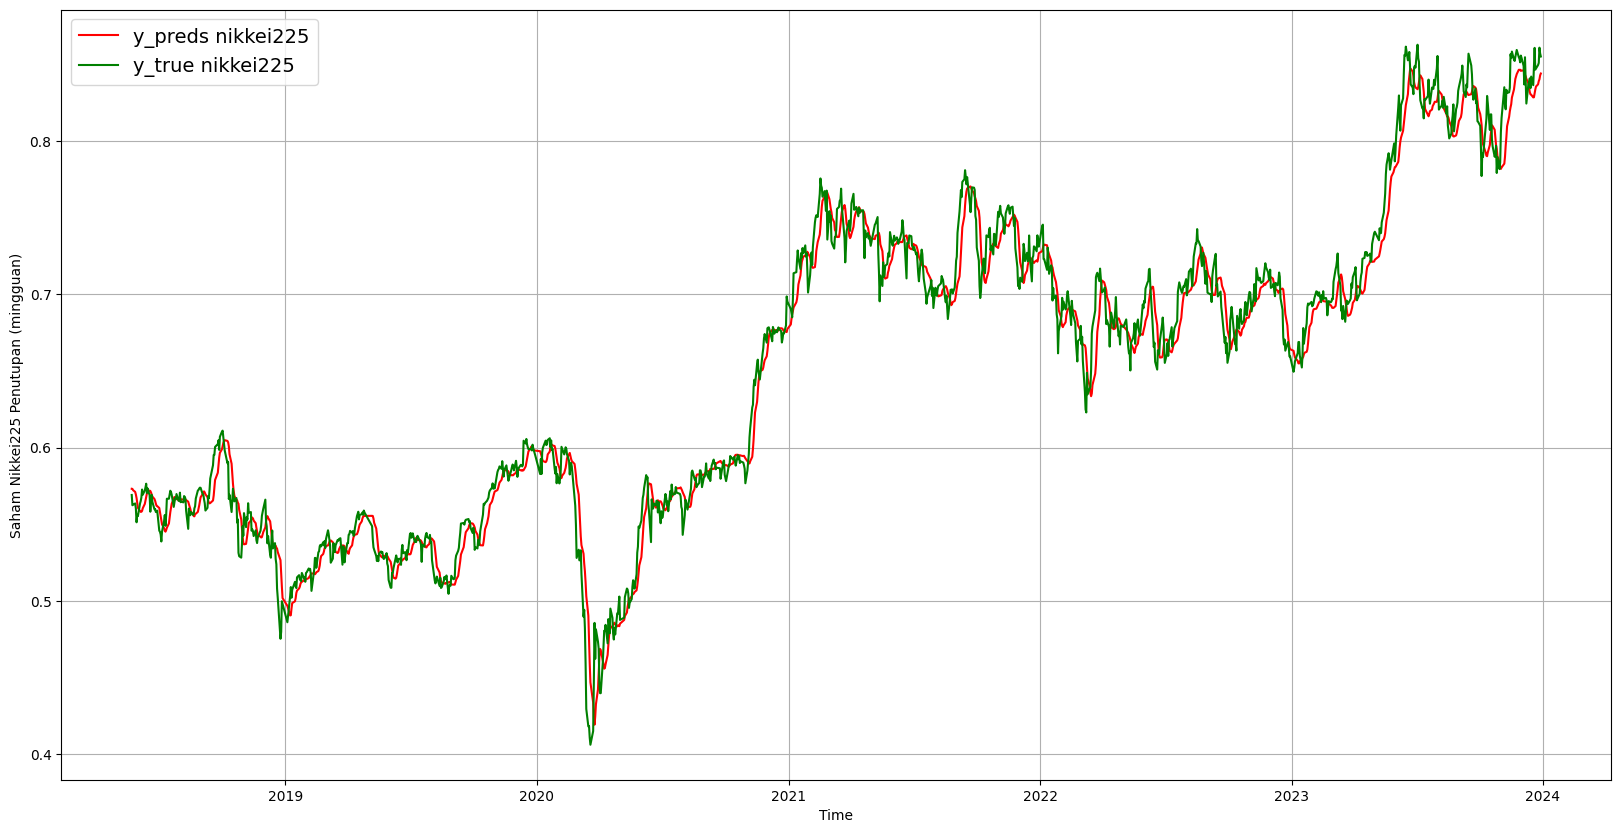

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_0_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 1: Conv1D

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


<ipython-input-102-b420bea64af7>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_windows.shape

(12395, 7, 3)

In [ ]:
train_labels.shape

(12395, 3)

In [ ]:
test_windows.shape

(1371, 7, 3)

In [ ]:
test_labels.shape

(1371, 3)

In [ ]:
test_labels.shape[1]

3

In [ ]:
tf.random.set_seed(42)

#create Conv1D model
model_1 = tf.keras.models.Sequential([
    #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding ="causal", activation = "relu"),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
    tf.keras.layers.Dense(test_labels.shape[1], activation = "relu")
    #filters adalah jumlah hidden unit dalam layers tersebut
    # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
    # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
], name = "model_1_conv1D")

#compile model 1
model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/10
96/97 [============================>.] - ETA: 0s - loss: 0.1317
Epoch 1: val_loss improved from inf to 0.01689, saving model to model_experiments/model_1_conv1D
97/97 [==============================] - 3s 22ms/step - loss: 0.1317 - val_loss: 0.0169
Epoch 2/10
93/97 [===========================>..] - ETA: 0s - loss: 0.1084
Epoch 2: val_loss improved from 0.01689 to 0.01450, saving model to model_experiments/model_1_conv1D
97/97 [==============================] - 1s 10ms/step - loss: 0.1085 - val_loss: 0.0145
Epoch 3/10
87/97 [=========================>....] - ETA: 0s - loss: 0.1091
Epoch 3: val_loss improved from 0.01450 to 0.01316, saving model to model_experiments/model_1_conv1D
97/97 [==============================] - 1s 10ms/step - loss: 0.1088 - val_loss: 0.0132
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.1081
Epoch 4: val_loss did not improve from 0.01316
97/97 [==============================] - 1s 7ms/step - loss: 0.1081 - val_loss: 0.0133
Epo

In [ ]:
model_1.summary()

Model: "model_1_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 128)            2048      
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2435 (9.51 KB)
Trainable params: 2435 (9.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 3ms/step - loss: 0.0125


0.012501759454607964

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("model_experiments/model_1_conv1D")
model_1.evaluate(test_windows, test_labels)


43/43 [==============================] - 0s 2ms/step - loss: 0.0125


0.012501759454607964

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds



43/43 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1371, 3), dtype=float32, numpy=
array([[0.57219213, 0.13030972, 0.        ],
       [0.57198673, 0.13035417, 0.        ],
       [0.5714786 , 0.13095263, 0.        ],
       ...,
       [0.8309904 , 0.10336221, 0.        ],
       [0.8343225 , 0.10388661, 0.        ],
       [0.83609295, 0.10235845, 0.        ]], dtype=float32)>

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)

model_1_results

{'mae': 0.012501759,
 'mse': 0.00027669288,
 'rmse': 0.016000051,
 'mape': 34.524906,
 'R-square': -1387443313.4984672}

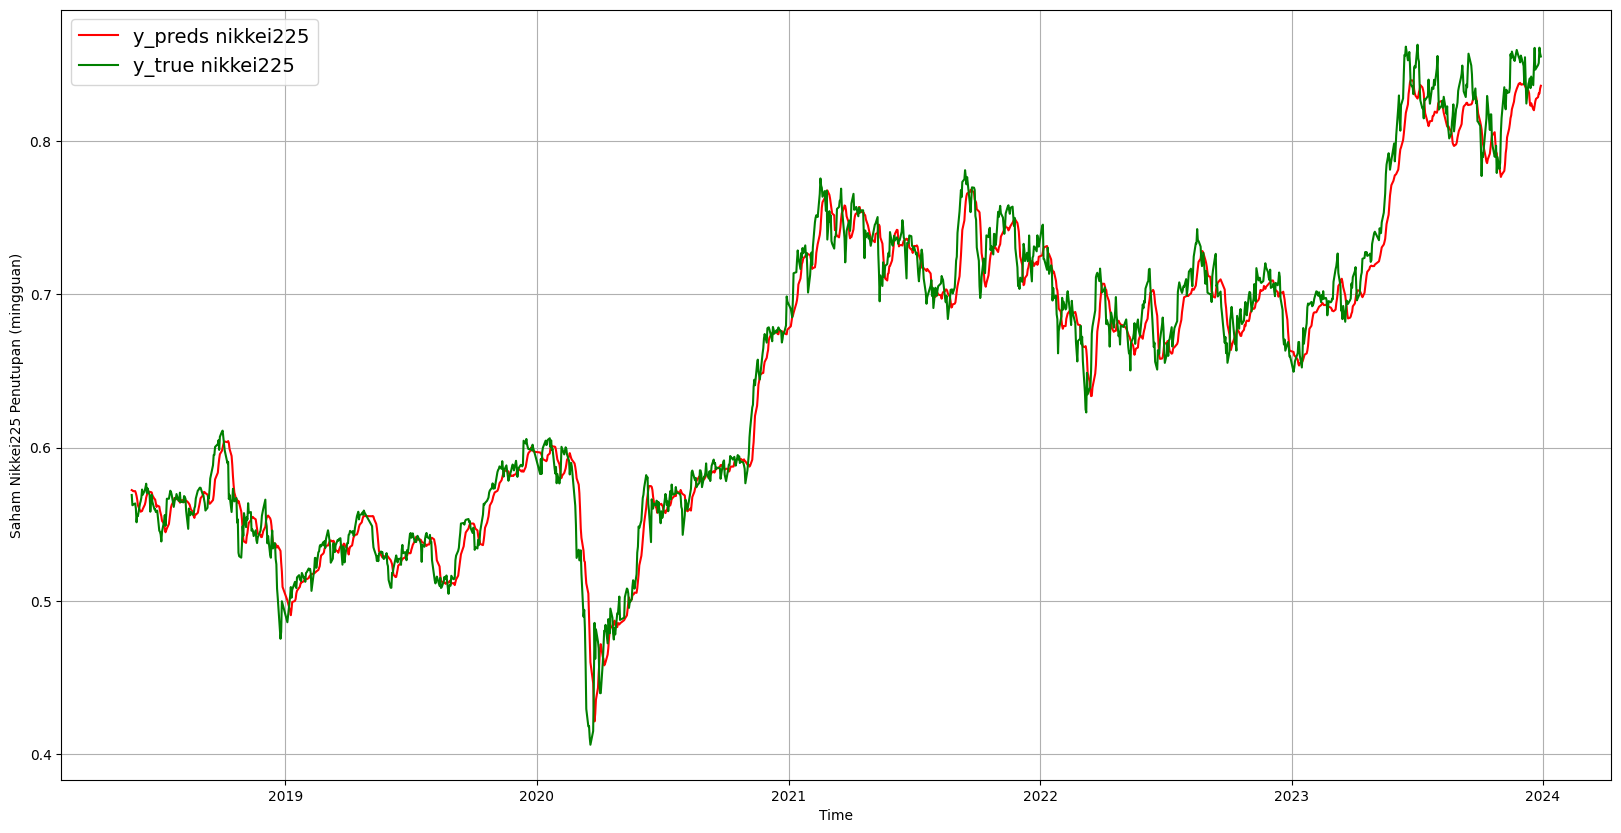

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_1_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 2 : LSTM

In [ ]:
train_windows.shape[2]

3

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(train_windows.shape[1], train_windows.shape[2]), return_sequences = False, activation = "relu"),
        #tf.keras.layers.Dropout(0.2),
        #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

        tf.keras.layers.Dense(test_labels.shape[1], activation = "relu")
        ], name = "model_2_LSTM")



#compile model 2
model_2.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.0786
Epoch 1: val_loss improved from inf to 0.01594, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 6s 44ms/step - loss: 0.0786 - val_loss: 0.0159
Epoch 2/10
96/97 [============================>.] - ETA: 0s - loss: 0.0086
Epoch 2: val_loss improved from 0.01594 to 0.01160, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 8s 80ms/step - loss: 0.0086 - val_loss: 0.0116
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 0.0061
Epoch 3: val_loss improved from 0.01160 to 0.01074, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 10s 106ms/step - loss: 0.0061 - val_loss: 0.0107
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.0055
Epoch 4: val_loss improved from 0.01074 to 0.00907, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 1

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67584     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 67971 (265.51 KB)
Trainable params: 67971 (265.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 5ms/step - loss: 0.0094


0.009368042461574078

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("model_experiments/model_2_LSTM")
model_2.evaluate(test_windows, test_labels)


43/43 [==============================] - 1s 9ms/step - loss: 0.0089


0.008863053284585476

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



43/43 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(1371, 3), dtype=float32, numpy=
array([[0.5760872 , 0.12812996, 0.0258905 ],
       [0.57545716, 0.12805745, 0.02599419],
       [0.573946  , 0.12790278, 0.0261681 ],
       ...,
       [0.8323315 , 0.11947744, 0.05314489],
       [0.8354204 , 0.11977112, 0.05341469],
       [0.836579  , 0.11986582, 0.05348626]], dtype=float32)>

In [ ]:
model_2_preds[:,2]

<tf.Tensor: shape=(1371,), dtype=float32, numpy=
array([0.0258905 , 0.02599419, 0.0261681 , ..., 0.05314489, 0.05341469,
       0.05348626], dtype=float32)>

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)

model_2_results

{'mae': 0.008863052,
 'mse': 0.00015802713,
 'rmse': 0.010383228,
 'mape': 16.570963,
 'R-square': -436380293.44338375}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1371,), dtype=float64, numpy=
array([0.5690225 , 0.5623098 , 0.56267579, ..., 0.86096445, 0.857203  ,
       0.85519902])>

In [ ]:
model_1_results

{'mae': 0.012501759,
 'mse': 0.00027669288,
 'rmse': 0.016000051,
 'mape': 34.524906,
 'R-square': -1387443313.4984672}

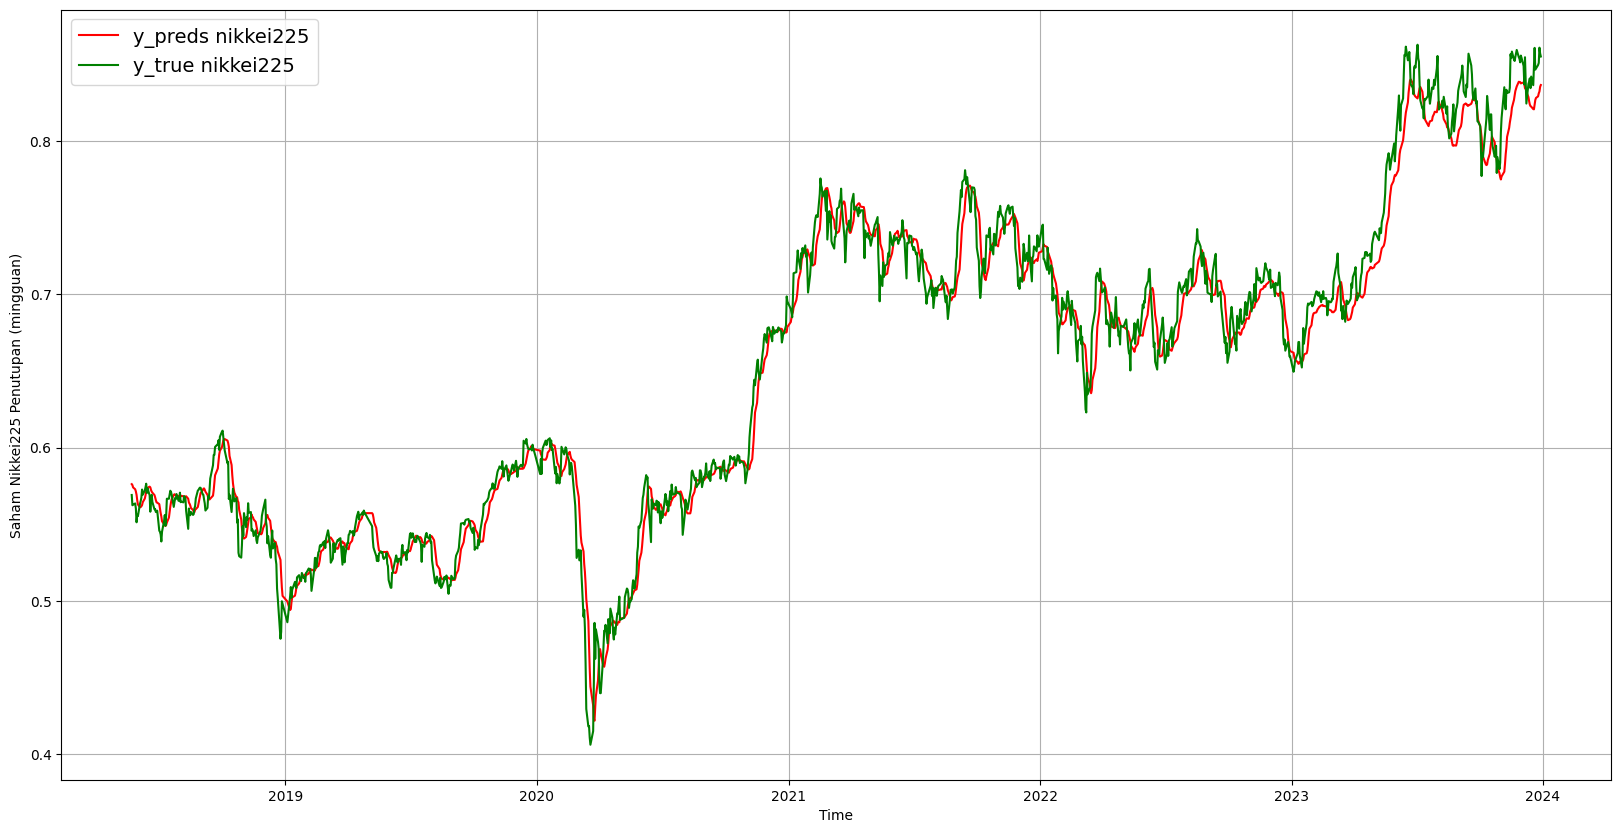

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_2_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 3 : Stacked LSTM

In [ ]:
train_windows.shape[2]

3

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(train_windows.shape[1], train_windows.shape[2]), return_sequences = True, activation = "relu"),
        #tf.keras.layers.Dropout(0.2, seed=42),
        tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

        #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

        tf.keras.layers.Dense(test_labels.shape[1], activation = "relu")
        ], name = "model_3_stackedLSTM")



#compile model 2
model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.0588
Epoch 1: val_loss improved from inf to 0.01323, saving model to model_experiments/model_3_stackedLSTM
97/97 [==============================] - 12s 101ms/step - loss: 0.0588 - val_loss: 0.0132
Epoch 2/10
96/97 [============================>.] - ETA: 0s - loss: 0.0088
Epoch 2: val_loss did not improve from 0.01323
97/97 [==============================] - 5s 55ms/step - loss: 0.0087 - val_loss: 0.0134
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 0.0073
Epoch 3: val_loss improved from 0.01323 to 0.00937, saving model to model_experiments/model_3_stackedLSTM
97/97 [==============================] - 9s 97ms/step - loss: 0.0073 - val_loss: 0.0094
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.0066
Epoch 4: val_loss did not improve from 0.00937
97/97 [==============================] - 5s 50ms/step - loss: 0.0066 - val_loss: 0.0122
Epoch 5/10
96/97 [==========================

In [ ]:
model_3.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("model_experiments/model_3_stackedLSTM")
model_3.evaluate(test_windows, test_labels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



43/43 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(1371, 3), dtype=float32, numpy=
array([[0.57437646, 0.1282788 , 0.01438618],
       [0.57429147, 0.12825115, 0.0144393 ],
       [0.573765  , 0.12822457, 0.01455501],
       ...,
       [0.8363032 , 0.13510814, 0.03312888],
       [0.8396053 , 0.13544442, 0.03324819],
       [0.84074384, 0.13557528, 0.03330883]], dtype=float32)>

In [ ]:
model_2_preds[:,2]

<tf.Tensor: shape=(1371,), dtype=float32, numpy=
array([0.0258905 , 0.02599419, 0.0261681 , ..., 0.05314489, 0.05341469,
       0.05348626], dtype=float32)>

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)

model_3_results

{'mae': 0.009369192,
 'mse': 0.00017517648,
 'rmse': 0.011244389,
 'mape': 11.428416,
 'R-square': -110352423.158145}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1371,), dtype=float64, numpy=
array([0.5690225 , 0.5623098 , 0.56267579, ..., 0.86096445, 0.857203  ,
       0.85519902])>

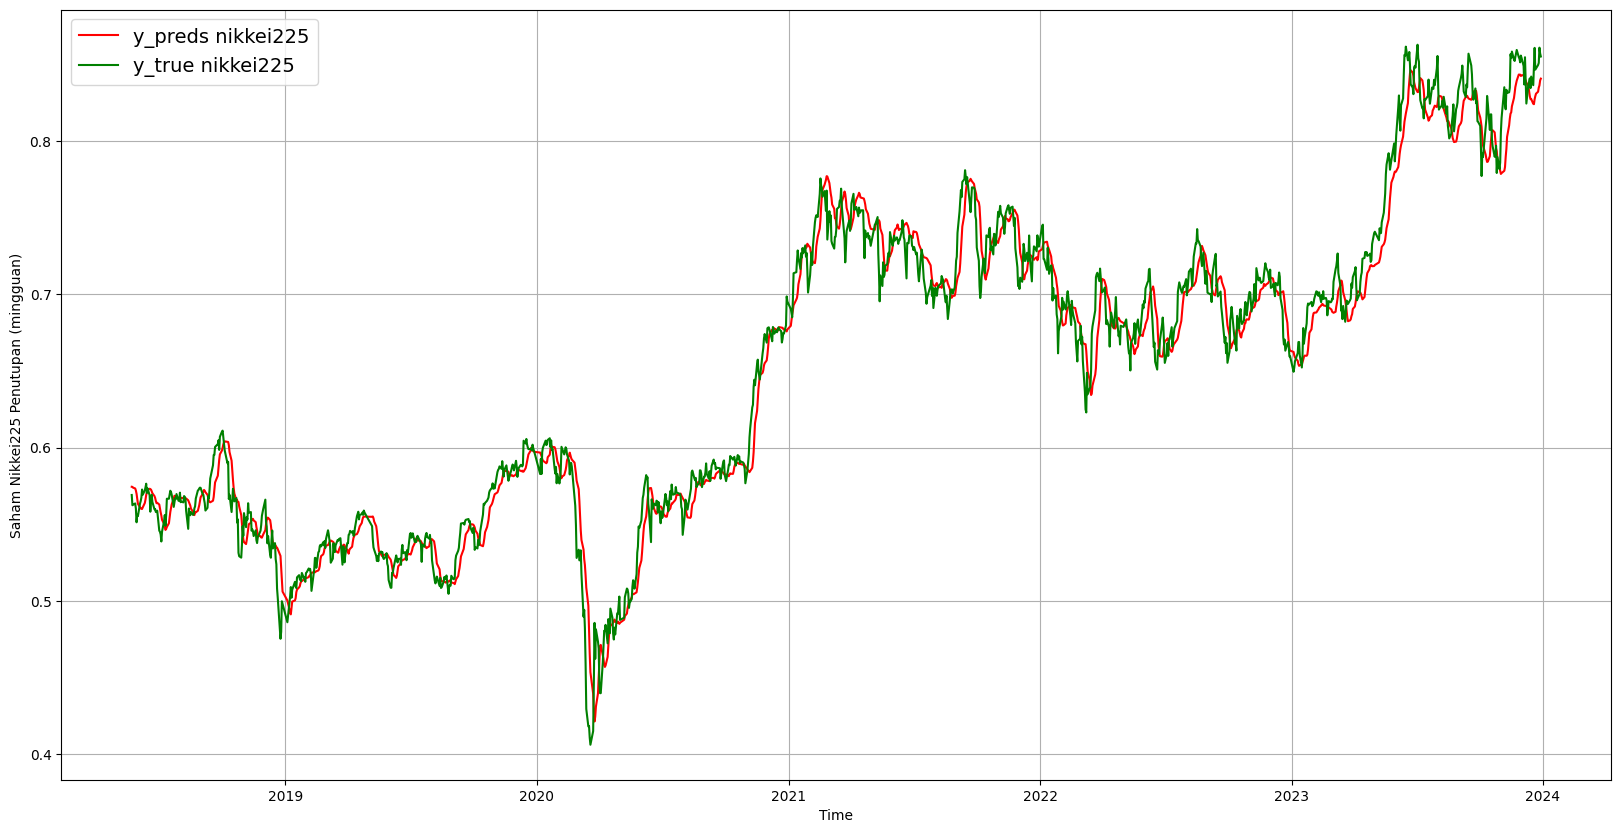

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_3_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 4 : Bidirectional LSTM

In [ ]:
train_windows.shape[2]

3

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,
                                                           input_shape=(train_windows.shape[1], train_windows.shape[2]),
                                                           return_sequences = False,
                                                           activation = "relu")),
        #tf.keras.layers.Dropout(0.2, seed=42),
        #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

        #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

        tf.keras.layers.Dense(test_labels.shape[1], activation = "relu")
        ], name = "model_4_bidirectionalLSTM")



#compile model 4
model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [ ]:
model_4.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_4.evaluate(test_windows, test_labels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_4 = tf.keras.models.load_model("model_experiments/model_4_bidirectionalLSTM")
model_4.evaluate(test_windows, test_labels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds



In [ ]:
model_4_preds[:,2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_4_preds)

model_4_results

In [ ]:
tf.squeeze(test_labels[:,0])

In [ ]:
model_1_results

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_4_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 5 : CNN-LSTM

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
  # YOUR CODE HERE.
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),
  tf.keras.layers.LSTM(128, return_sequences=False),
  tf.keras.layers.Dense(test_labels.shape[1], activation = "relu"),
  ], name = "model_5_CNN-LSTM")



#compile model 3
model_5.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

In [ ]:
model_5.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_5.evaluate(test_windows, test_labels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_5 = tf.keras.models.load_model("model_experiments/model_5_CNN-LSTM")
model_5.evaluate(test_windows, test_labels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds



In [ ]:
model_5_preds[:,2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_5_preds)

model_5_results

In [ ]:
tf.squeeze(test_labels[:,0])

In [ ]:
test_labels[:, 0]

In [ ]:
model_5_results

In [ ]:
model_2_results

In [ ]:
model_5_results

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_5_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


Visualisasi hasil metric evaluasi

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "CNN-LSTM": model_5_results["mae"]},

             index = ["mae"]).plot(figsize = (10,7), kind = "bar")

# Membuat univariate time series forecasting stock price

In [ ]:
print(full_windows[:, 0]),
print(full_windows[:, 0].shape)
print("\n")
print(full_labels[:, 0])
print(full_labels[:, 0].shape)

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')

memanggil variabel window dan label untuk univariate nikkei stock price

In [ ]:
X_nikkei.shape, y_nikkei.shape

reshape dimensi X_nikkei dan y_nikkei dan masukkan ke variabel baru

In [ ]:
train_nikkeiWindows = np.squeeze(X_nikkei[:train_size])
test_nikkeiWindows = np.squeeze(X_nikkei[train_size:])

train_nikkeiLabels = np.squeeze(y_nikkei[:train_size])
test_nikkeiLabels = np.squeeze(y_nikkei[train_size:])

In [ ]:
train_nikkeiWindows.shape, test_nikkeiWindows.shape

In [ ]:
train_nikkeiWindows.shape[1]

In [ ]:
train_nikkeiLabels.shape, test_nikkeiLabels.shape

# Model 6: Conv1D Univariate

In [ ]:
train_nikkeiWindows.shape

In [ ]:
tf.random.set_seed(42)

#create Conv1D model
model_6 = tf.keras.models.Sequential([
    #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding ="causal",
                           input_shape = (WINDOW_SIZE, 1)),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
    tf.keras.layers.Dense(1)

    #filters adalah jumlah hidden unit dalam layers tersebut
    # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
    # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
], name = "model_6_conv1D_univariate")

#compile model 1
model_6.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
model_6.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

In [ ]:
model_6.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_6 = tf.keras.models.load_model("model_experiments/model_6_conv1D_univariate")
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_6_preds = tf.squeeze(model_6.predict(test_nikkeiWindows))
model_6_preds



In [ ]:
model_6_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_6_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_6_preds)

model_6_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_6_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 7: LSTM Univariate

In [ ]:

tf.random.set_seed(42)

model_7 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(WINDOW_SIZE, 1), return_sequences = False, activation = "relu"),
        #tf.keras.layers.Dropout(0.2),
        #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

        tf.keras.layers.Dense(1, activation = "relu")
        ], name = "model_7_LSTM_univariate")



#compile model 2
model_7.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_7.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_7.name)])

In [ ]:
model_7.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_7 = tf.keras.models.load_model("model_experiments/model_7_LSTM_univariate")
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_7_preds = tf.squeeze(model_7.predict(test_nikkeiWindows))
model_7_preds



In [ ]:
model_7_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_7_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_7_preds)

model_7_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_7_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


 # Model 8 : Stacked LSTM univariate

In [ ]:

tf.random.set_seed(42)

model_8 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(WINDOW_SIZE, 1), return_sequences = True, activation = "relu"),
        #tf.keras.layers.Dropout(0.2, seed=42),
        tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

        #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

        tf.keras.layers.Dense(1, activation = "relu")
        ], name = "model_8_stackedLSTM_univariate")


#compile model 2
model_8.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_8.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_8.name)])

In [ ]:
model_8.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_8 = tf.keras.models.load_model("model_experiments/model_8_stackedLSTM_univariate")
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_8_preds = tf.squeeze(model_8.predict(test_nikkeiWindows))
model_8_preds



In [ ]:
model_8_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_8_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_8_preds)

model_8_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_8_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 9: Bidirectional LSTM Univariate

In [ ]:
train_nikkeiWindows.shape

In [ ]:
test_nikkeiLabels.shape

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.models.Sequential([
        #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                      input_shape=[WINDOW_SIZE]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=(WINDOW_SIZE, 1), return_sequences = False, activation = "relu")),
        #tf.keras.layers.Dropout(0.2, seed=42),
        #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

        #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

        tf.keras.layers.Dense(1)
        ], name = "model_9_bidirectionalLSTM_univariate")


#compile model 2
model_9.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_9.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_9.name)])

In [ ]:
model_9.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_9 = tf.keras.models.load_model("model_experiments/model_9_bidirectionalLSTM_univariate")
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(test_nikkeiWindows))
model_9_preds



In [ ]:
model_9_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_9_preds)

model_9_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_9_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 10: CNN-LSTM Univariate

In [ ]:
tf.random.set_seed(42)

#create Conv1D model
model_10 = tf.keras.models.Sequential([
    #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu",
                          input_shape=[WINDOW_SIZE, 1]),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dense(1),
    #filters adalah jumlah hidden unit dalam layers tersebut
    # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
    # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
], name = "model_10_CNN-LSTM_univariate")

#compile model 1
model_10.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
model_10.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_10.name)])

In [ ]:
model_10.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_10= tf.keras.models.load_model("model_experiments/model_10_CNN-LSTM_univariate")
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_10_preds = tf.squeeze(model_10.predict(test_nikkeiWindows))
model_10_preds



In [ ]:
model_10_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_10_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_10_preds)

model_10_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_10_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# visualisasi hasil evaluasi metrik

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "Stacked LSTM" : model_3_results["mae"],
              "Bidirectional LSTM" : model_4_results["mae"],
              "CNN-LSTM": model_5_results["mae"],
              "Conv1D Univariate" : model_6_results["mae"],
              "LSTM univariate" : model_7_results["mae"],
              "Stacked LSTM Univariate" : model_8_results["mae"],
              "Bidirectional LSTM Univariate" : model_9_results["mae"],
              "CNN_LSTM Univariate" : model_10_results["mae"]},
             index = ["mae"]).plot(figsize = (10,7), kind = "bar")

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["mse"],
              "LSTM": model_2_results["mse"],
              "Stacked LSTM" : model_3_results["mse"],
              "Bidirectional LSTM" : model_4_results["mse"],
              "CNN-LSTM": model_5_results["mse"],
              "Conv1D Univariate" : model_6_results["mse"],
              "LSTM univariate" : model_7_results["mse"],
              "Stacked LSTM Univariate" : model_8_results["mse"],
              "Bidirectional LSTM Univariate" : model_9_results["mse"],
              "CNN_LSTM Univariate" : model_10_results["mse"]},
             index = ["mse"]).plot(figsize = (10,7), kind = "bar")

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["rmse"],
              "LSTM": model_2_results["rmse"],
              "Stacked LSTM" : model_3_results["rmse"],
              "Bidirectional LSTM" : model_4_results["rmse"],
              "CNN-LSTM": model_5_results["rmse"],
              "Conv1D Univariate" : model_6_results["rmse"],
              "LSTM univariate" : model_7_results["rmse"],
              "Stacked LSTM Univariate" : model_8_results["rmse"],
              "Bidirectional LSTM Univariate" : model_9_results["rmse"],
              "CNN_LSTM Univariate" : model_10_results["rmse"]},
             index = ["rmse"]).plot(figsize = (10,7), kind = "bar")

In [ ]:

pd.DataFrame({
              "Conv1D": model_1_results["mape"],
              "LSTM": model_2_results["mape"],
              "Stacked LSTM" : model_3_results["mape"],
              "Bidirectional LSTM" : model_4_results["mape"],
              "CNN-LSTM": model_5_results["mape"],
              "Conv1D Univariate" : model_6_results["mape"],
              "LSTM univariate" : model_7_results["mape"],
              "Stacked LSTM Univariate" : model_8_results["mape"],
              "Bidirectional LSTM Univariate" : model_9_results["mape"],
              "CNN_LSTM Univariate" : model_10_results["mape"]},
             index = ["mape"]).plot(figsize = (10,7), kind = "bar")